In [1]:
from __future__ import division
import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
import numpy as np
import glob
import sys
import pandas as pd

In [2]:
nb_dir = '/home/dup193/work/double_pulse/stat_analysis'
if nb_dir not in sys.path:
    sys.path.append(nb_dir)
    
from event_selection import EventSelectionPreCut, MakeSimSum, EventSelectionPreCutNoTail

In [3]:
LLH = -0.1
Qst1 = 2000
Qst2 = 10
Qst3 = 10
NET1 =0.7
NET2 =0.7
NET3 =0.7

In [199]:
#data = np.load('/fastio2/dasha/double_pulse/data_2011test_BurnSample_Run00118175.npy', mmap_mode='r')
data0 = np.load('/fastio2/dasha/double_pulse/data_data_2011-2020_1stage.npy', mmap_mode='r')
print(data0.shape)
live_time_2011 = 29192322.290000003
live_time_2012 = 27933639.350000046
live_time_2013 = 30489193.010000072
live_time_2014 = 31252846.21000001
live_time_2015 = 31233388.500000015
live_time_2016 = 30504717.320000015
live_time_2017 = 35343947.07999996
live_time_2018 = 31837236.94999999
live_time_2019 = 27039442.88000001
live_time_2020 = 30857934.87000001
live_time = live_time_2011+live_time_2012+live_time_2013+live_time_2014+live_time_2015+\
live_time_2016+live_time_2017+live_time_2018+live_time_2019+live_time_2020
print(live_time)

(64952,)
305684668.4600001


In [145]:
print("Events {0:.2f}+/-{1:.2f}".format(data0.shape[0],np.sqrt(data0.shape[0])))
print("Corsika, No ovesizing")
data_c0= np.load('/fastio2/dasha/double_pulse/data_20904_corsika_test.npy', mmap_mode='r')
print("Events {0:.2f}+/-{1:.2f}".format(sum(data_c0['weight_val']*live_time),np.sqrt(np.sum(np.square(data_c0['weight_val']*live_time)))))
print(data_c0.shape)
#Genie
data_tc0 = np.load('/fastio2/dasha/double_pulse/data_FLUXES_NuTau_1_1.npy',mmap_mode='r')
data_mc0 = np.load('/fastio2/dasha/double_pulse/data_FLUXES_NuMu_1_1.npy',mmap_mode='r')
data_ec0 = np.load('/fastio2/dasha/double_pulse/data_FLUXES_NuE_1_1.npy',mmap_mode='r')
data_eg0 = np.load('/fastio2/dasha/double_pulse/data_FLUXES_NuE_3_1.npy',mmap_mode='r')
data_n0 = np.load('/fastio2/dasha/double_pulse/data_FLUXES_NuALL_2_1.npy',mmap_mode='r')
data_ac0 = np.load('/fastio2/dasha/double_pulse/data_AtmosConv.npy',mmap_mode='r')
data_ap0 = np.load('/fastio2/dasha/double_pulse/data_AtmosPrompt.npy',mmap_mode='r')

Events 64952.00+/-254.86
Corsika, No ovesizing
Events 905199.88+/-13001.32
(59311,)


In [146]:
data_tc,data_mc,data_ec,data_eg,data_n,data_ac,data_ap,data_c = \
    EventSelectionPreCutNoTail(data_tc0,data_mc0,data_ec0,data_eg0,data_n0,data_ac0,data_ap0,data_c0)
print(data_tc0.shape,data_mc0.shape,data_ec0.shape,data_eg0.shape,data_n0.shape,data_ac0.shape,data_ap0.shape,data_c0.shape)
print(data_tc.shape,data_mc.shape,data_ec.shape,data_eg.shape,data_n.shape,data_ac.shape,data_ap.shape,data_c.shape)

(128278,) (462405,) (420185,) (4267,) (154981,) (1165870,) (708917,) (59311,)
(105605,) (78779,) (381885,) (2857,) (140207,) (632235,) (494806,) (57487,)


In [200]:
masklt = data0['logan_veto']['SPE_rlogl']-data0['logan_veto']['Cascade_rlogl'] > 0.5
data0 = data0[masklt]

In [148]:
path = "/home/dup193/work/double_pulse/dataframes/"
sig, sim   = MakeSimSum(data_tc,data_mc,data_ec,data_eg,data_n,data_ac,data_ap,data_c,path, livetime=live_time,\
             weight_name='weight_val_0', weight_name_c = 'weight_val', wtype ='nom')
print(sig.shape, sim.shape)

(105605, 10) (1893861, 10)


In [149]:
data_label = [8]*len(data0)
array_data = np.array([data_label, data0['qtot'],data0['logan_veto']['SPE_rlogl']-data0['logan_veto']['Cascade_rlogl'],\
                    data0['qst']['q'][:,0],data0['qst']['q'][:,1],data0['qst']['q'][:,2],data0['preds']['n1'],data0['preds']['n2'],\
                    data0['preds']['n3']]).T 
index_values_data = range(len(array_data))
column_values_data = ['label', 'qtot', 'llh_diff', 'qst0','qst1','qst2','n1', 'n2', 'n3'] 
data = pd.DataFrame(data = array_data,  index = index_values_data, columns = column_values_data)
print(data0.shape)

(58540,)


In [201]:
def PlotW2(Name,Label,data,xscale='linear',b =200,r =[0,1], loc =8):
    fig = plt.figure(figsize=(20, 5),facecolor ='w')
    ax = fig.add_subplot(111)
    plt.rcParams.update({'font.size': 16})
    plt.ticklabel_format(axis='both', style='sci', scilimits=(-5,5))
    ax.set_xscale(xscale)
    ax.set_yscale('log')
    ax.set_title(Name, fontsize = 16)
    ax.text(0.01,0.86,'#MuonGun '+str(len(data)), transform=ax.transAxes, color = "black",fontsize=12)  
    ax.set_xlabel(Label, fontsize = 16)                                                              
    ax.set_ylabel("#Events per Year", fontsize = 16)                                                   
    ax.hist(data, bins =b, histtype = 'step',edgecolor ='k', lw =2, range = r, label = "Tail Events")  
    
    plt.legend(loc=loc)

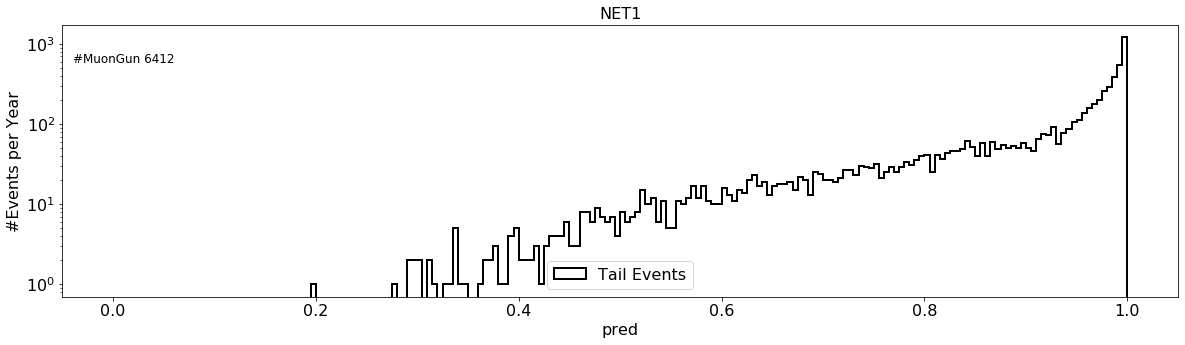

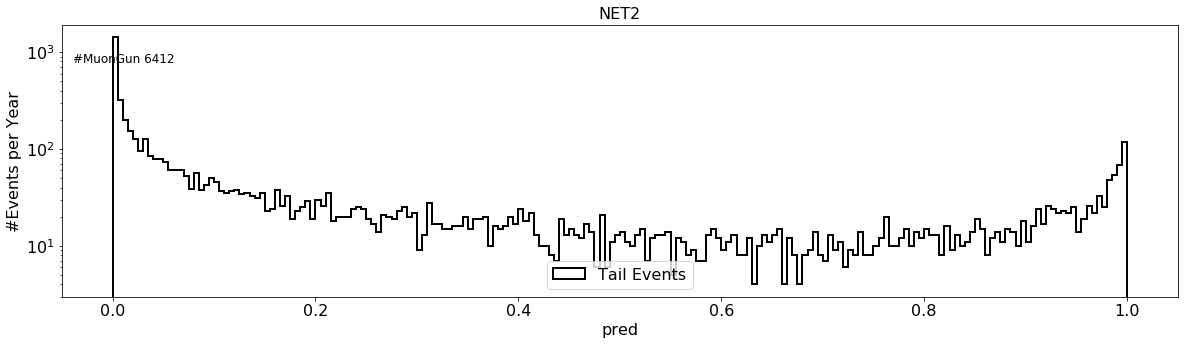

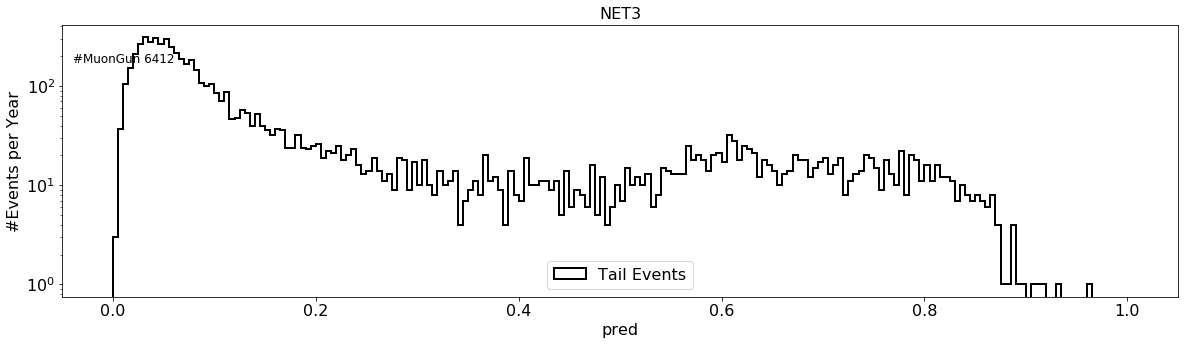

In [202]:
PlotW2("NET1", "pred", data0['preds']['n1'])
PlotW2("NET2", "pred", data0['preds']['n2'])
PlotW2("NET3", "pred", data0['preds']['n3'])

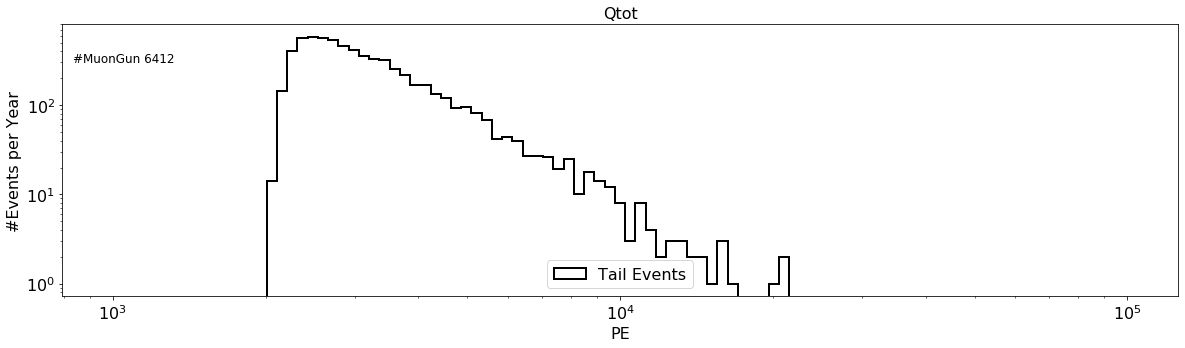

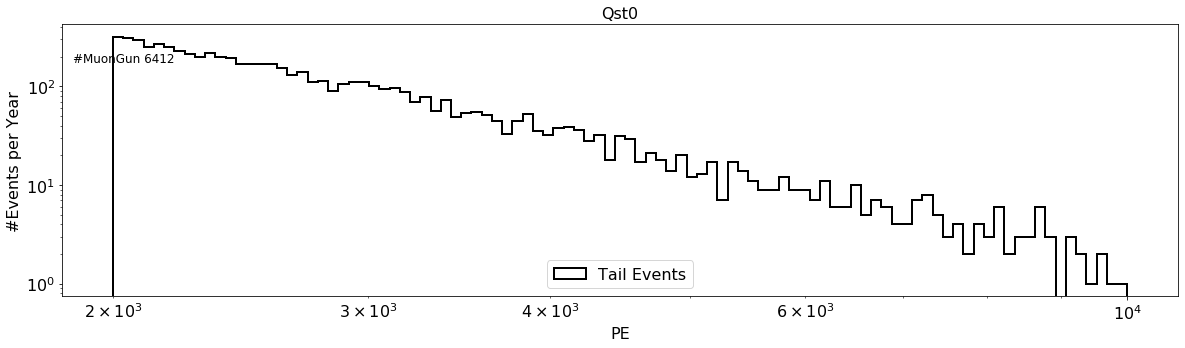

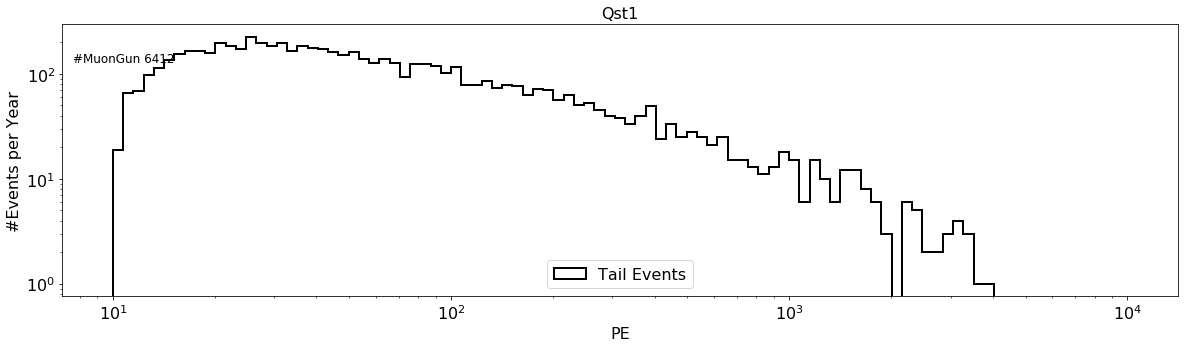

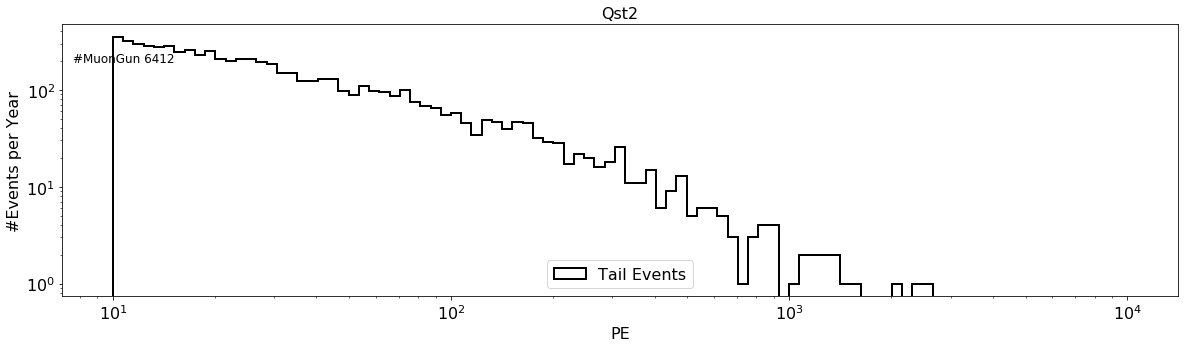

In [205]:
PlotW2("Qtot", "PE", data0['qtot'],xscale='log',b =np.logspace(np.log10(1000),np.log10(100000),100), loc =8)
PlotW2("Qst0", "PE", data0['qst']['q'][:,0],xscale='log',b =np.logspace(np.log10(2000),np.log10(10000),100), loc =8)
PlotW2("Qst1", "PE", data0['qst']['q'][:,1],xscale='log',b =np.logspace(np.log10(10),np.log10(10000),100), loc =8)
PlotW2("Qst2", "PE", data0['qst']['q'][:,2],xscale='log',b =np.logspace(np.log10(10),np.log10(10000),100), loc =8)

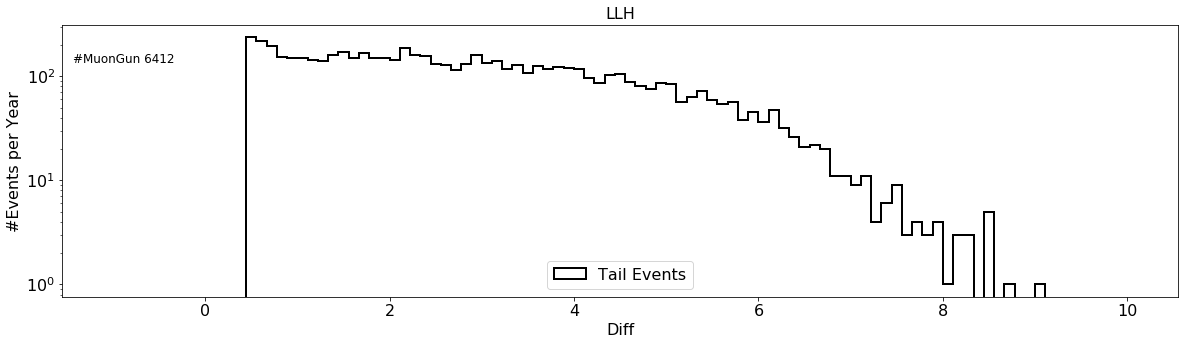

In [204]:
PlotW2("LLH", "Diff", data0['logan_veto']['SPE_rlogl']-data0['logan_veto']['Cascade_rlogl'],xscale='linear',b =np.linspace(-1,10,100), loc =8)

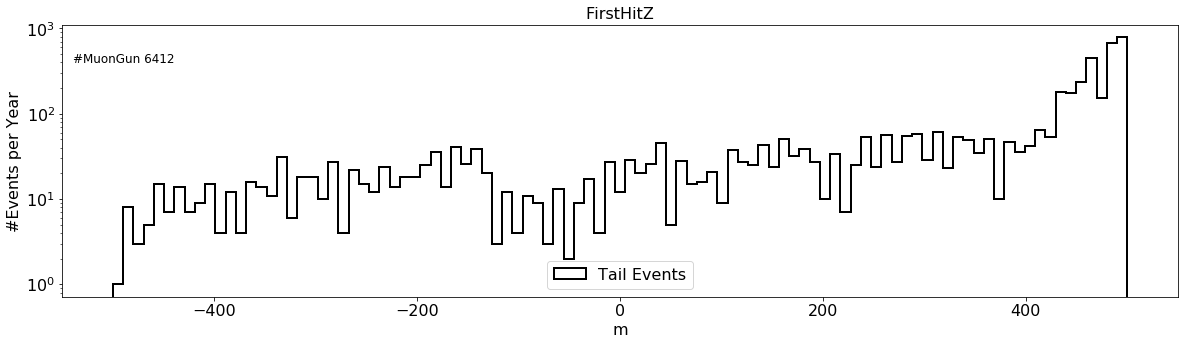

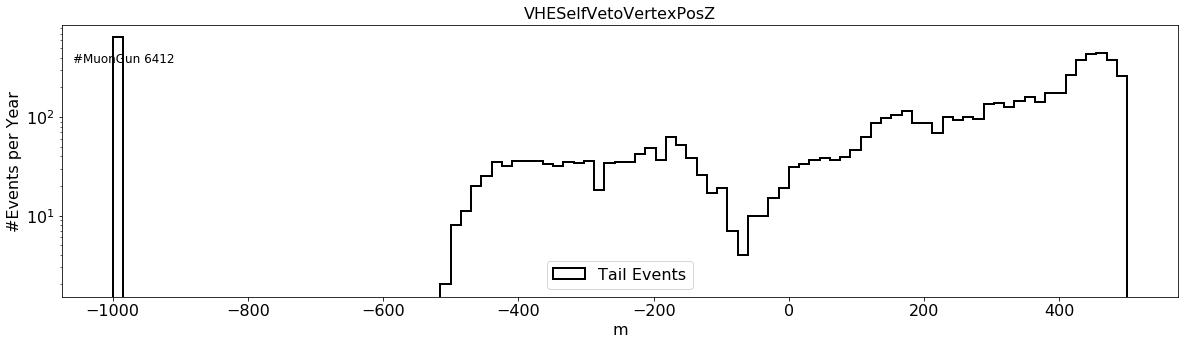

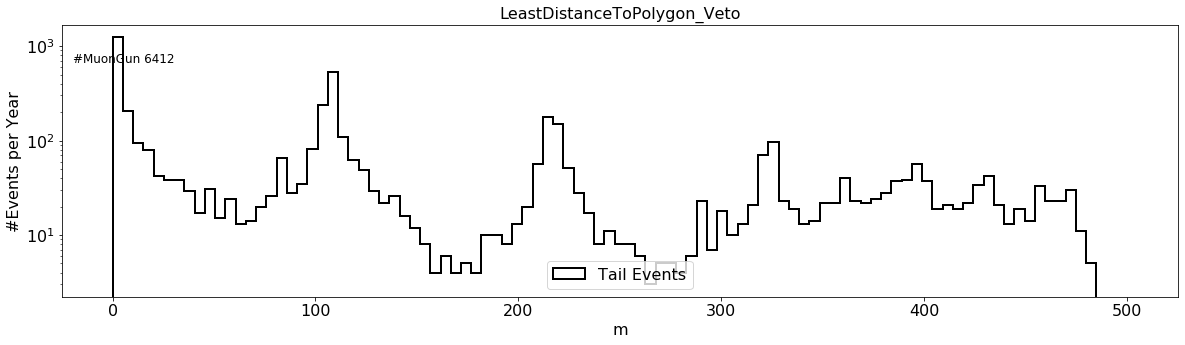

In [218]:
PlotW2("FirstHitZ", "m", data0['logan_veto']['FirstHitZ'],xscale='linear',b =np.linspace(-500,500,100), loc =8)
PlotW2("VHESelfVetoVertexPosZ", "m", data0['logan_veto']['VHESelfVetoVertexPosZ'],xscale='linear',b =np.linspace(-1000,500,100), loc =8)
PlotW2("LeastDistanceToPolygon_Veto", "m", data0['logan_veto']['LeastDistanceToPolygon_Veto'],xscale='linear',b =np.linspace(0,500,100), loc =8)

In [154]:
maskq_sig = (sig['qst0'] >= Qst1) & (sig['qst1'] >= Qst2) & (sig['qst2'] >= Qst3)
maskq_sim = (sim['qst0'] >= Qst1) & (sim['qst1'] >= Qst2) & (sim['qst2'] >= Qst3)
maskq_data = (data['qst0'] >= Qst1) & (data['qst1'] >= Qst2) & (data['qst2'] >= Qst3)
print(sig[maskq_sig].shape,sim[maskq_sim].shape,data[maskq_data].shape)

(54441, 10) (1220329, 10) (58540, 9)


In [155]:
masks_sig = (sig['n1'] <= NET1) | (sig['n2'] <= NET2) | (sig['n3'] <= NET3) 
masks_sim = (sim['n1'] <= NET1) | (sim['n2'] <= NET2) | (sim['n3'] <= NET3) 
masks_data = (data['n1'] <= NET1) | (data['n2'] <= NET2) | (data['n3'] <= NET3)
print(sig[masks_sig].shape,sim[masks_sim].shape,data[masks_data].shape)

(79736, 10) (1708138, 10) (58540, 9)


In [156]:
mask_sig = maskq_sig & masks_sig
mask_sim = maskq_sim & masks_sim
mask_data = maskq_data & masks_data
print(sig[mask_sig].shape,sim[mask_sim].shape,data[mask_data].shape)

(33671, 10) (1072243, 10) (58540, 9)


In [157]:
print("NuTauCC = {0:.2f} +/- {1:.2f}".format(np.sum(sig[mask_sig]['weight']*live_time),np.sqrt(np.sum(np.square(sig[mask_sig]['weight']*live_time)))))
print("SimSum = {0:.2f} +/- {1:.2f}".format(np.sum(sim[mask_sim]['weight']*live_time),np.sqrt(np.sum(np.square(sim[mask_sim]['weight']*live_time)))))
print("Data = {0:.2f} +/- {1:.2f}".format(np.sum(data.shape[0]),np.sqrt((data.shape[0]))))       

NuTauCC = 160.46 +/- 1.57
SimSum = 56715.44 +/- 2339.66
Data = 58540.00 +/- 241.95


In [158]:
m = sim['llh_diff'] >1990
print(sim.shape,sim[m].shape)
d = data['llh_diff'] >1990
print(data.shape,data[d].shape)

(1893861, 10) (0, 10)
(58540, 9) (0, 9)


In [188]:
def Plot(sig,sim,bs,w_sig,w_sim,mask_sig,mask_sim,mask_bs,livetime,name,label,bins,scale,ylim,loc =1,use_mask= False, ratio = True):
    fig = plt.figure(figsize=(20, 5),facecolor ='w')
    gs = gridspec.GridSpec(2,1, height_ratios=[3.5,2], wspace=0.04, hspace=0.04)
    ax = fig.add_subplot(gs[0])
    plt.rcParams.update({'font.size': 16})
    plt.ticklabel_format(axis='both', style='sci', scilimits=(-5,5))
    ax.set_xscale(scale)
    ax.set_yscale('log')
    ax.set_title(name, fontsize = 16)
    #ax.text(0.01,0.95,'#NuTauCC '+str(len(data_t)), transform=ax.transAxes, color = "black",fontsize=12)
    ax.set_ylim(ylim[0],ylim[1])
    ax.set_xlabel(label, fontsize = 16)                                                              
    ax.set_ylabel("#Events", fontsize = 16) 
    if use_mask:
        n_bs, _, _ = ax.hist(bs[mask_bs], histtype = 'step',edgecolor = 'k', lw =2,  bins = bins, label = "Data")  
        n_sim, _, _ = ax.hist(sim[mask_sim], weights = w_sim[mask_sim]*livetime, histtype = 'step',edgecolor = 'b', lw =2,  bins = bins, label = "SimSum")  
        er_sim, _ = np.histogram(sim[mask_sim], bins =bins, weights = (w_sim[mask_sim]*livetime)**2)
        n_sig, _, _ = ax.hist(sig[mask_sig], weights = w_sig[mask_sig]*livetime, histtype = 'step',edgecolor = 'r', lw =2,  bins = bins, label = "NuTauCC")  
        er_sig, _ = np.histogram(sig[mask_sig], bins =bins, weights = (w_sig[mask_sig]*livetime)**2)   
    else:
        n_bs, _, _ = ax.hist(bs, histtype = 'step',edgecolor = 'k', lw =2,  bins = bins, label = "Data")  
        n_sim, _, _ = ax.hist(sim, weights = w_sim*livetime, histtype = 'step',edgecolor = 'b', lw =2,  bins = bins, label = "SimSum")  
        er_sim, _ = np.histogram(sim, bins =bins, weights = (w_sim*livetime)**2)
        n_sig, _, _ = ax.hist(sig, weights = w_sig*livetime, histtype = 'step',edgecolor = 'r', lw =2,  bins = bins, label = "NuTauCC")  
        er_sig, _ = np.histogram(sig, bins =bins, weights = (w_sig*livetime)**2)   
   
    #for i,b in enumerate(n_sim):
    #    print(b,np.sqrt(er_sim[i]))
    bin_centers = 0.5*(bins[1:] + bins[:-1])
    plt.errorbar(bin_centers, n_bs, yerr = np.sqrt(n_bs), lw =1, capsize = 2,fmt='.k')
    plt.errorbar(bin_centers, n_sim, yerr = np.sqrt(er_sim), lw =1, capsize = 2,fmt='.b')
    plt.errorbar(bin_centers, n_sig, yerr = np.sqrt(er_sig), lw =1, capsize = 2,fmt='.r')
    plt.legend(loc=loc)
    
    if ratio: 
        with np.errstate(divide='ignore', invalid='ignore'):
            b_rat = np.nan_to_num(n_bs/n_sim)
            err = b_rat*np.sqrt(np.nan_to_num(1/n_bs) + np.nan_to_num((np.sqrt(er_sim)/(n_sim))**2))
    
        ax = fig.add_subplot(gs[1])
        ax.set_xscale(scale)
        ax.set_yscale('log')
        #ax.set_title('Ratio BurnSample/Corsika', fontsize = 16)
        ax.set_ylim(10**(-1),10**(1))
        #ax.set_ylim(0,4)
        ax.set_xlabel(label, fontsize = 16)                                                              
        ax.set_ylabel("Ratio", fontsize = 16) 
        ax.axhline(y =1, ls = '--')
        plt.bar(bins[:-1],b_rat,np.diff(bins), yerr = err, capsize = 2, fill =False)
        #plt.errorbar(, ns, yerr = err, lw =1, capsize = 2,fmt='.k')

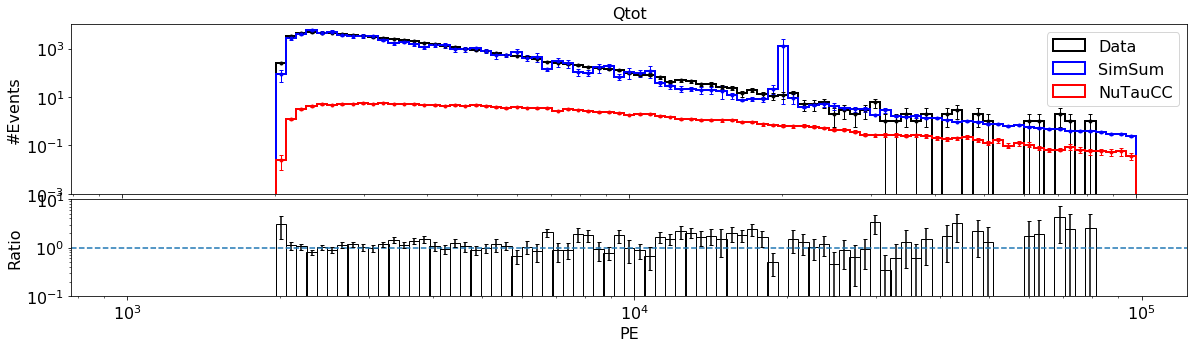

In [189]:
Plot(sig['qtot'],sim['qtot'],data['qtot'],sig['weight'],sim['weight'],mask_sig,mask_sim,mask_data,live_time,"Qtot","PE",ylim = [10**(-3),10**(4)],bins=np.logspace(np.log10(1000),np.log10(100000),100),scale = 'log',use_mask= True)

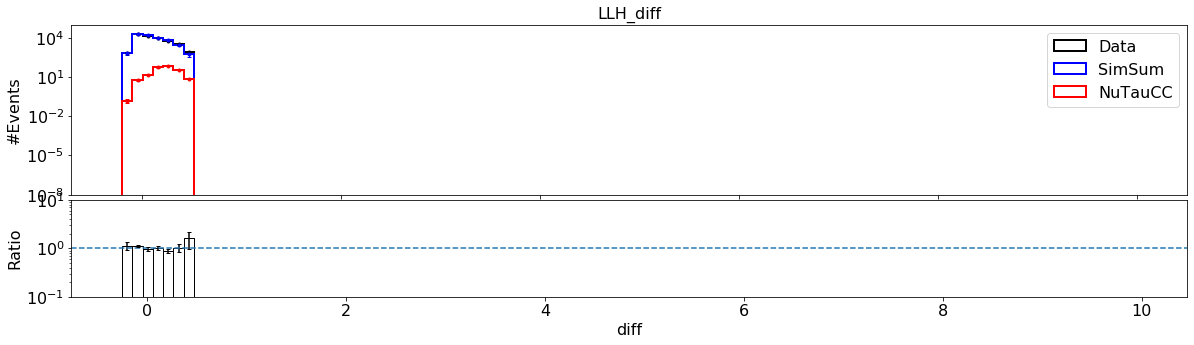

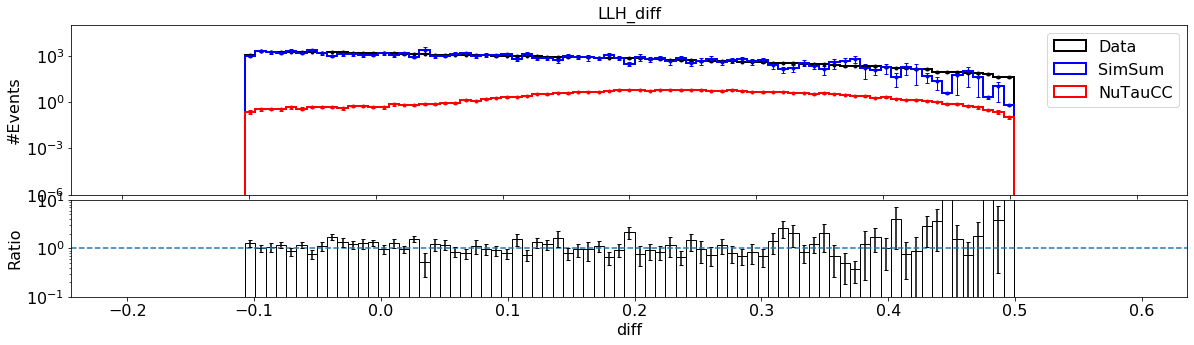

In [206]:
Plot(sig['llh_diff'],sim['llh_diff'],data['llh_diff'],sig['weight'],sim['weight'],maskq_sig,maskq_sim,maskq_data,live_time,"LLH_diff","diff",ylim = [10**(-8),10**(5)],bins=np.linspace(-0.2,10,100),scale = 'linear',use_mask= True)
Plot(sig['llh_diff'],sim['llh_diff'],data['llh_diff'],sig['weight'],sim['weight'],maskq_sig,maskq_sim,maskq_data,live_time,"LLH_diff","diff",ylim = [10**(-6),10**(5)],bins=np.linspace(-0.2,0.6,100),scale = 'linear',use_mask= True)

In [191]:
m_dl = data['llh_diff'] < 0.5
m_sigl = sig['llh_diff'] < 0.5
m_siml = sim['llh_diff'] < 0.5

print(data.shape, data[m_dl].shape, data[m_dl].shape[0]/data.shape[0])
print(sig.shape, sig[m_sigl].shape, sig[m_sigl].shape[0]/sig.shape[0])
print(sim.shape, sim[m_siml].shape, sim[m_siml].shape[0]/sim.shape[0])

(58540, 9) (58540, 9) 1.0
(105605, 10) (105605, 10) 1.0
(1893861, 10) (1893861, 10) 1.0


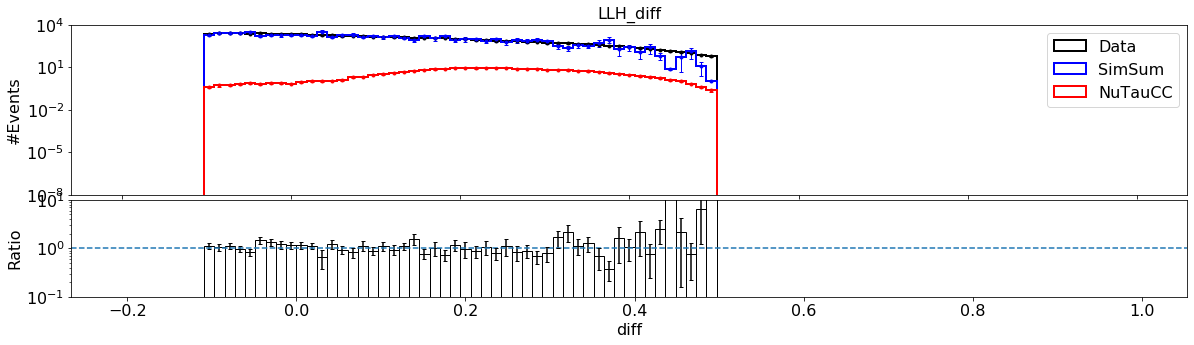

In [192]:
Plot(sig['llh_diff'],sim['llh_diff'],data['llh_diff'],sig['weight'],sim['weight'],maskq_sig,maskq_sim,maskq_data,live_time,"LLH_diff","diff",bins=np.linspace(-0.2,1,100),ylim =[10**(-8),10**(4)],scale = 'linear',use_mask= True)

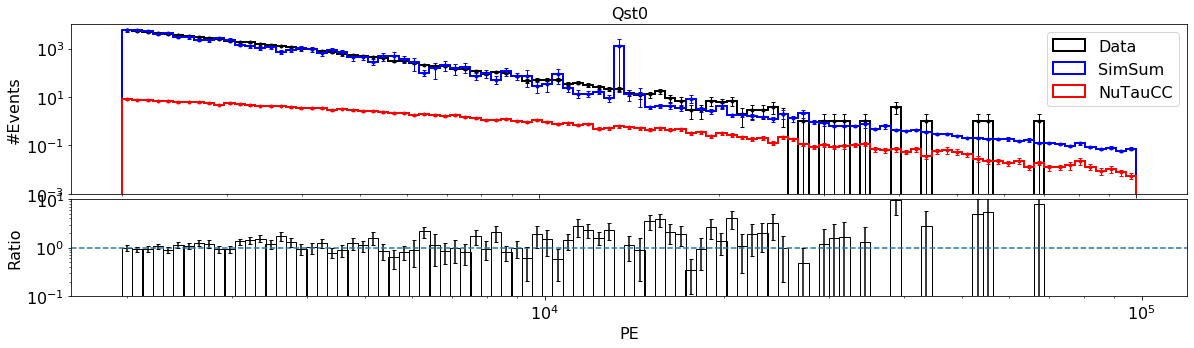

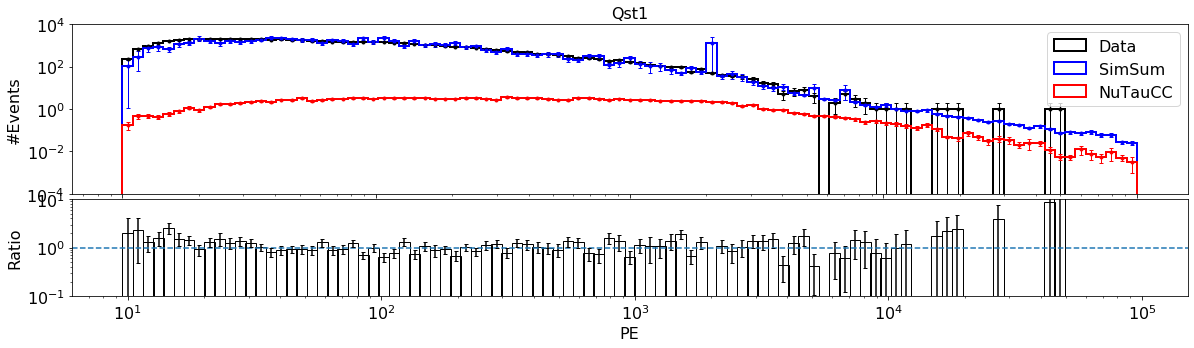

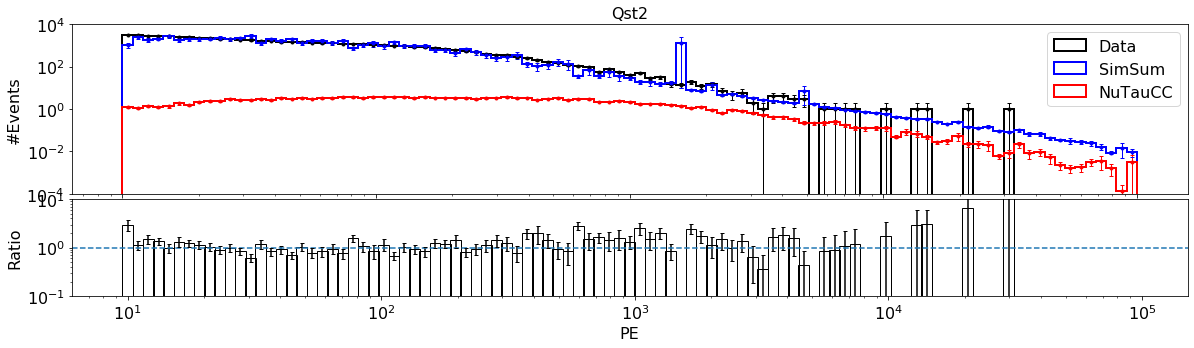

In [193]:
Plot(sig['qst0'],sim['qst0'],data['qst0'],sig['weight'],sim['weight'],mask_sig,mask_sim,mask_data,live_time,"Qst0","PE",bins=np.logspace(np.log10(2000),np.log10(100000),100),ylim =[10**(-3),10**(4)],scale = 'log',use_mask= True)
Plot(sig['qst1'],sim['qst1'],data['qst1'],sig['weight'],sim['weight'],mask_sig,mask_sim,mask_data,live_time,"Qst1","PE",bins=np.logspace(np.log10(10),np.log10(100000),100),ylim =[10**(-4),10**(4)],scale = 'log',use_mask= True)
Plot(sig['qst2'],sim['qst2'],data['qst2'],sig['weight'],sim['weight'],mask_sig,mask_sim,mask_data,live_time,"Qst2","PE",bins=np.logspace(np.log10(10),np.log10(100000),100),ylim =[10**(-4),10**(4)],scale = 'log',use_mask= True)

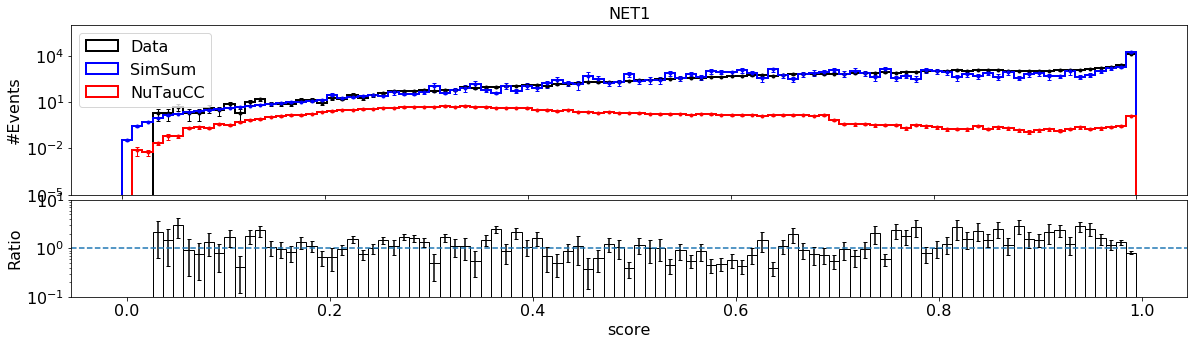

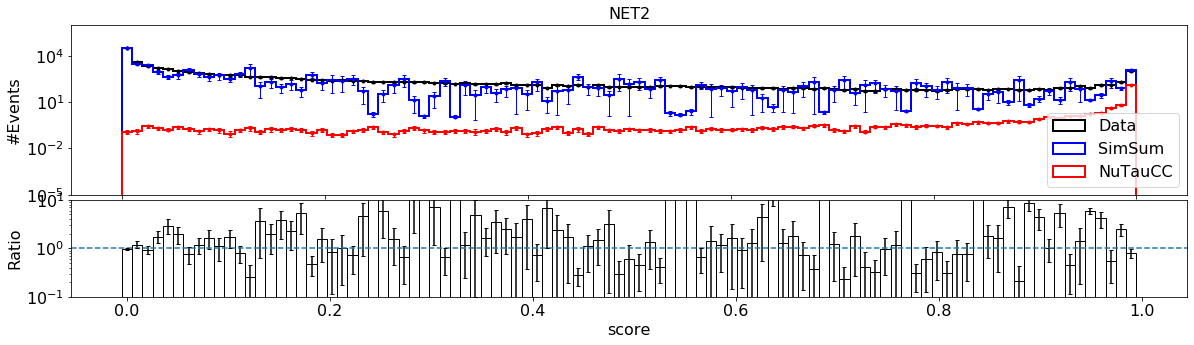

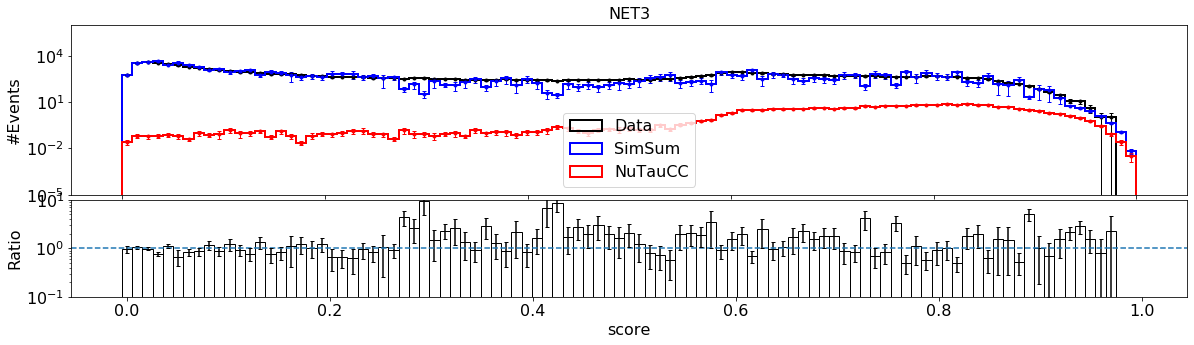

In [194]:
Plot(sig['n1'],sim['n1'],data['n1'],sig['weight'],sim['weight'],mask_sig,mask_sim,mask_data,live_time,"NET1","score",bins=np.linspace(0,1,100),ylim =[10**(-5),10**(6)],loc =0,scale = 'linear',use_mask= True)
Plot(sig['n2'],sim['n2'],data['n2'],sig['weight'],sim['weight'],mask_sig,mask_sim,mask_data,live_time,"NET2","score",bins=np.linspace(0,1,100),ylim =[10**(-5),10**(6)],loc =4,scale = 'linear',use_mask= True)
Plot(sig['n3'],sim['n3'],data['n3'],sig['weight'],sim['weight'],mask_sig,mask_sim,mask_data,live_time,"NET3","score",bins=np.linspace(0,1,100),ylim =[10**(-5),10**(6)],loc =8,scale = 'linear',use_mask= True)


In [195]:
maskq_c = (data_c['qst']['q'][:,0] >= Qst1) & (data_c['qst']['q'][:,1] >= Qst2) & (data_c['qst']['q'][:,2] >= Qst3)
masks_c = (data_c['preds']['n1'] <= NET1) | (data_c['preds']['n2_1'] <= NET2) | (data_c['preds']['n3'] <= NET3) 
mask_c = maskq_c & masks_c


/home/dup193/anaconda3/lib/python3.7/site-packages/matplotlib/axes/_axes.py:3370: RuntimeWarning: overflow encountered in double_scalars
  high = [v + e for v, e in zip(data, b)]


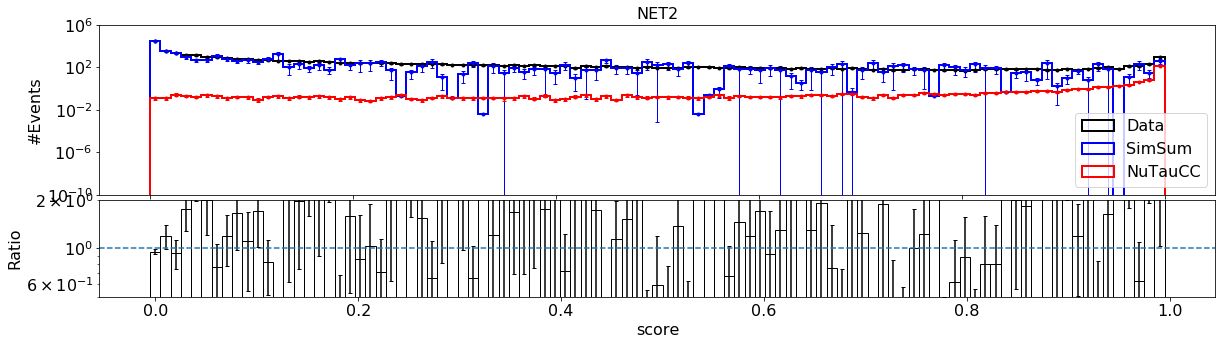

In [186]:
Plot(sig['n2'],data_c['preds']['n2_1'],data['n2'],sig['weight'],data_c['weight_val'],mask_sig,mask_c,mask_data,live_time,"NET2","score",bins=np.linspace(0,1,100),ylim =[10**(-10),10**(6)],loc =4,scale = 'linear',use_mask= True)


In [187]:
mask_2 = (0.207 < data_c['preds']['n2_1']) & (data_c['preds']['n2_1']<= 0.208)
data_c[mask_2 & mask_c]['preds']['n2_1']

array([0.20746098, 0.20794597], dtype=float32)